In [1]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
#Para uso en Windows
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


In [2]:
placa = []
image = cv2.imread('C:/Users/jenif/Documents/EJERCITO Y PNC2.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

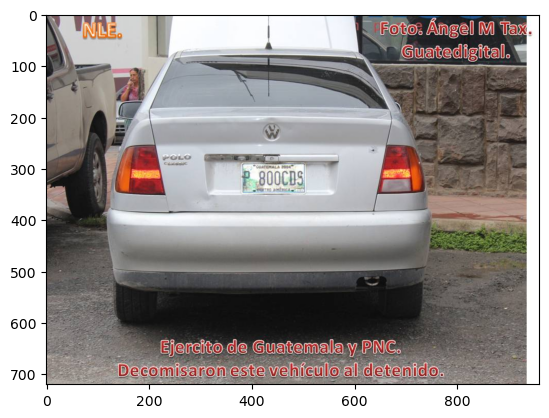

In [3]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

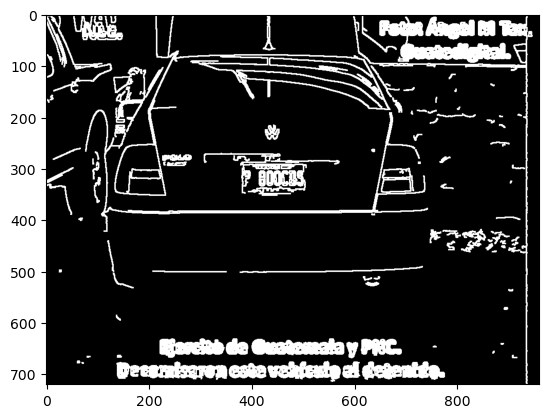

In [4]:
#blur es el difuminado 
gray = cv2.blur(gray, (3,3))
canny = cv2.Canny(gray,130,200)
canny = cv2.dilate(canny, None, iterations=1)
plt.imshow(canny, cmap='gray');

In [5]:
contorno, _ = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
#CHAIN_APPROX_SIMPLE = EL contorno 

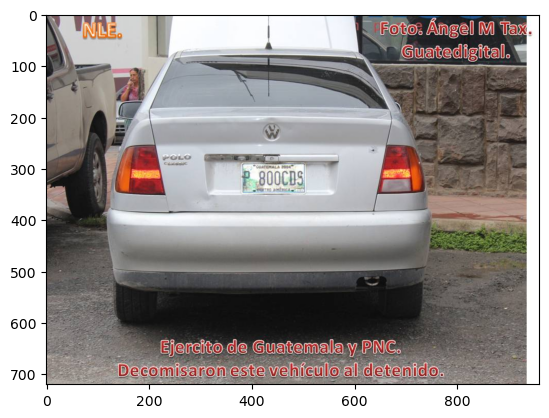

In [6]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

In [ ]:
for c in contorno:
    area = cv2.contourArea(c)
    #print(area)
    x, y, w, h = cv2.boundingRect(c) 
    epsilon = 0.09* cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, epsilon, True)
    if len(approx) == 4 and area > 15000:
        print('area:',area)
        print('w:', w)
        print('h:', h)
        aspect_ratio =float(w)/h
        print('Relación de apectos:', aspect_ratio)
        cv2.drawContours(image, [approx], 0, (0, 255, 0),3)
        if aspect_ratio >2.5:
            placa = gray[y:y+h,x:x+w]
            text = pytesseract.image_to_string(placa, config='--psm 11').strip()
            print('Placa', text)
            cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0),3)
            cv2.putText(image, text, (x-20, y-10), 1,2.2,(0,255,0),3)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));